In [1]:
# !pip install pandas_datareader

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import pandas_datareader as data

In [3]:
!pip install yfinance

In [4]:
import yfinance as yf

# Define the start and end dates
start = '2010-01-01'
end = '2019-12-31'

# Specify the stock symbol (e.g., 'AAPL' for Apple)
symbol = 'AAPL'

# Fetch the data using yfinance
df = yf.download(symbol, start=start, end=end)

# Print the DataFrame
df.head()


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.479000,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.490200,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.386964,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.375156,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.417542,447610800


In [5]:
df.tail(2)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-27,72.779999,73.492500,72.029999,72.449997,70.583107,146266000
2019-12-30,72.364998,73.172501,71.305000,72.879997,71.002029,144114400


In [6]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.479000,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.490200,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.386964,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.375156,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.417542,447610800


In [7]:
df = df.drop(['Date','Adj Close'],axis=1)
df.head(2)

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800


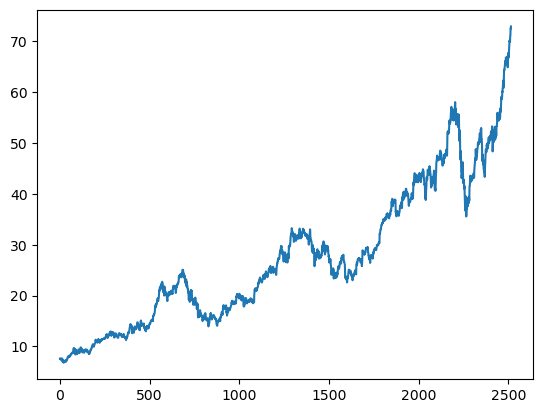

In [8]:
# on close column

plt.plot(df.Close)

In [9]:
df.shape

(2515, 5)

In [10]:
#Moving average 100

ma100 = df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    59.201075
2511    59.401700
2512    59.643125
2513    59.875125
2514    60.106325
Name: Close, Length: 2515, dtype: float64

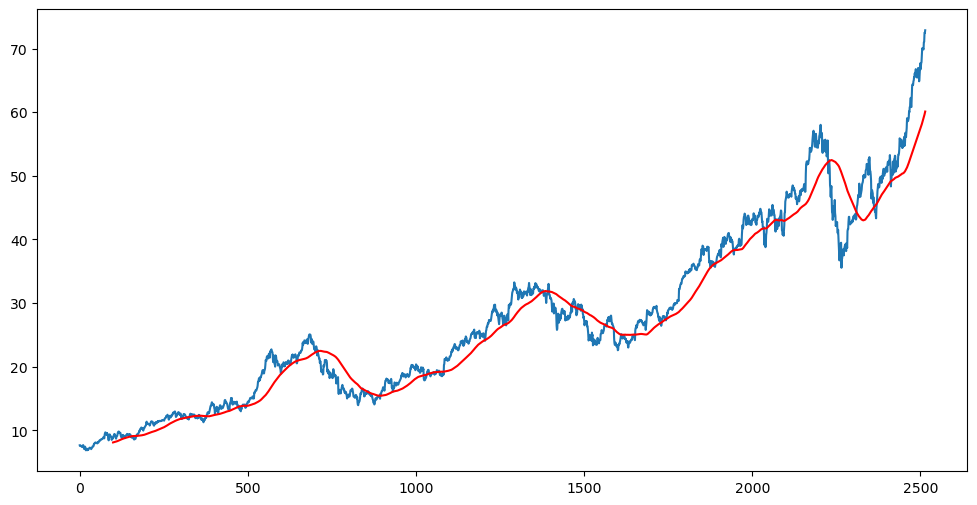

In [11]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [12]:
#Moving average 200

ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    54.132313
2511    54.261513
2512    54.396763
2513    54.529350
2514    54.661100
Name: Close, Length: 2515, dtype: float64

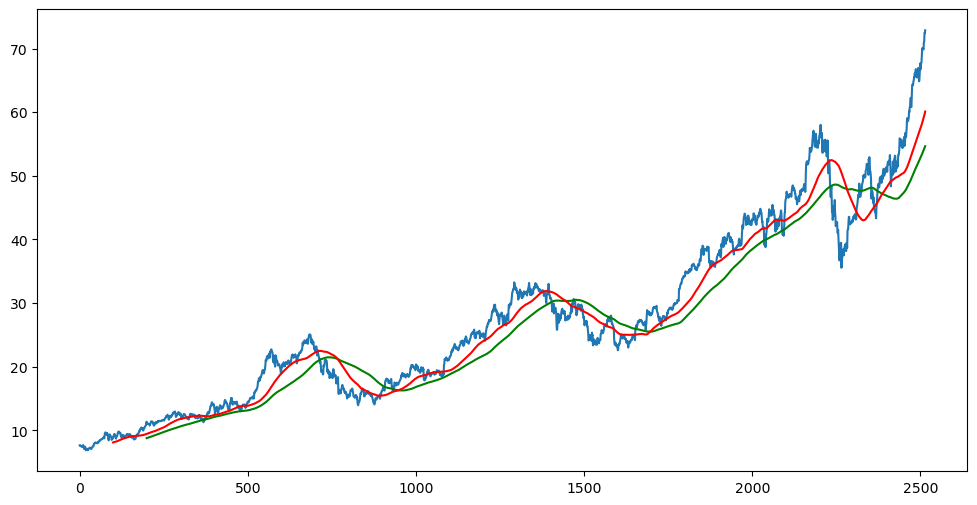

In [13]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma200,'g')
plt.plot(ma100,'r')

In [14]:
df.shape

(2515, 5)

In [15]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1760, 1)
(755, 1)


In [16]:
data_training.head(2)

,Close
0,7.643214
1,7.656429


In [17]:
data_testing.head(2)

,Close
1760,29.182501
1761,28.955000


In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler(feature_range=(0,1))

In [19]:
data_training_array = scaler.fit_transform(data_training)

In [20]:
data_training_array

array([[0.02971782],
       [0.03021854],
       [0.02560389],
       ...,
       [0.84388656],
       [0.85089656],
       [0.84616011]])

In [21]:
data_training_array.shape

(1760, 1)

In [22]:
x_train = []
y_train = []

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])


In [23]:
x_train

[array([[2.97178191e-02],
        [3.02185410e-02],
        [2.56038878e-02],
        [2.50760817e-02],
        [2.69706691e-02],
        [2.44400837e-02],
        [2.12057268e-02],
        [2.51708129e-02],
        [2.35198380e-02],
        [1.87833875e-02],
        [3.11116846e-02],
        [2.66323796e-02],
        [2.16793646e-02],
        [7.71362572e-03],
        [1.49130326e-02],
        [1.87969205e-02],
        [2.14222733e-02],
        [9.79765742e-03],
        [1.35149573e-05],
        [3.62674239e-03],
        [5.15593812e-03],
        [9.71645927e-03],
        [0.00000000e+00],
        [4.61461711e-03],
        [2.80124591e-03],
        [5.60252796e-03],
        [4.15451231e-03],
        [8.95862792e-03],
        [1.12727391e-02],
        [1.53596224e-02],
        [1.42093514e-02],
        [1.47235702e-02],
        [1.30184452e-02],
        [1.13268532e-02],
        [6.77986503e-03],
        [1.16516638e-02],
        [1.34650350e-02],
        [1.70105973e-02],
        [2.2

In [24]:
y_train

[0.08295551228400305,
 0.08773257990217087,
 0.09307799845000786,
 0.09730023009576089,
 0.0961770070574276,
 0.08648757770355114,
 0.07969414350828452,
 0.07751538062663765,
 0.06921979868242539,
 0.0791122414851117,
 0.08317207682631655,
 0.08421406557612648,
 0.09153526969304987,
 0.10176602006208679,
 0.10801813324219289,
 0.11099529041682749,
 0.1057175550640102,
 0.11069759999473855,
 0.10680016095808181,
 0.10413424529903986,
 0.10102168559811647,
 0.10318693352250902,
 0.0867717531683857,
 0.08049257393752157,
 0.07636509153754628,
 0.07428107790167715,
 0.07656810498635613,
 0.09015490110439062,
 0.08937002176865727,
 0.09144055658352146,
 0.08828741587458566,
 0.08085794755463022,
 0.08211646471050432,
 0.08038430973448946,
 0.07828674500511662,
 0.07244058645013152,
 0.08097972671491666,
 0.08415993347461043,
 0.09062857506078076,
 0.09187357725940049,
 0.09098043372063502,
 0.09747614135756338,
 0.09325390971181036,
 0.0893970878194153,
 0.08823328377306966,
 0.094458330902

In [25]:
x_train,y_train = np.array(x_train),np.array(y_train)

In [26]:
x_train

array([[[0.02971782],
        [0.03021854],
        [0.02560389],
        ...,
        [0.07403745],
        [0.07195343],
        [0.07045129]],

       [[0.03021854],
        [0.02560389],
        [0.02507608],
        ...,
        [0.07195343],
        [0.07045129],
        [0.08295551]],

       [[0.02560389],
        [0.02507608],
        [0.02697067],
        ...,
        [0.07045129],
        [0.08295551],
        [0.08773258]],

       ...,

       [[0.74224237],
        [0.74300022],
        [0.7582516 ],
        ...,
        [0.84795991],
        [0.84900194],
        [0.84170783]],

       [[0.74300022],
        [0.7582516 ],
        [0.76668248],
        ...,
        [0.84900194],
        [0.84170783],
        [0.84388656]],

       [[0.7582516 ],
        [0.76668248],
        [0.7708505 ],
        ...,
        [0.84170783],
        [0.84388656],
        [0.85089656]]])

In [27]:
x_train.shape

(1660, 100, 1)

In [28]:
from keras.layers import Dense,Dropout,LSTM

from keras.models import Sequential

In [29]:
model = Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,
              input_shape=(x_train.shape[1],1)))

model.add(Dropout(0.2))

model = Sequential()
model.add(LSTM(units=60,activation='relu',return_sequences=True))

model.add(Dropout(0.3))

model = Sequential()
model.add(LSTM(units=80,activation='relu',return_sequences=True))

model.add(Dropout(0.4))

model = Sequential()
model.add(LSTM(units=120,activation='relu'))

model.add(Dropout(0.5))


model.add(Dense(units=1))

In [30]:
model.summary

<bound method Model.summary of <keras.src.engine.sequential.Sequential object at 0x0000015D296985D0>>

In [31]:
model.compile(optimizer='adam',
             loss='mean_squared_error')

model.fit(x_train,y_train,epochs=50)


Epoch 1/50

52/52 [==============================] - 5s 53ms/step - loss: 0.0830
Epoch 2/50
52/52 [==============================] - 3s 51ms/step - loss: 0.0131
Epoch 3/50
52/52 [==============================] - 3s 60ms/step - loss: 0.0111
Epoch 4/50
52/52 [==============================] - 3s 50ms/step - loss: 0.0098
Epoch 5/50
52/52 [==============================] - 2s 47ms/step - loss: 0.0099
Epoch 6/50
52/52 [==============================] - 3s 59ms/step - loss: 0.0082
Epoch 7/50
52/52 [==============================] - 2s 43ms/step - loss: 0.0080
Epoch 8/50
52/52 [==============================] - 2s 42ms/step - loss: 0.0075
Epoch 9/50
52/52 [==============================] - 2s 46ms/step - loss: 0.0074
Epoch 10/50
52/52 [==============================] - 3s 57ms/step - loss: 0.0070
Epoch 11/50
52/52 [==============================] - 2s 40ms/step - loss: 0.0071
Epoch 12/50
52/52 [==============================] - 3s 56ms/step - loss: 0.0066
Epoch 13/50
52/52 [================

In [55]:
model.save('keras_model.h5')

C:\Users\udaya\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [40]:
data_testing.shape

(755, 1)

In [33]:
data_testing.head(4)

,Close
1760,29.182501
1761,28.955000
1762,29.037500
1763,29.004999


In [34]:
data_training.tail(100)

,Close
1660,27.092501
1661,27.202499
1662,27.000000
1663,26.982500
1664,27.045000
...,...
1755,29.264999
1756,29.072500
1757,29.129999
1758,29.315001


In [35]:
past_100 = data_training.tail(100)

In [38]:
import pandas as pd

final_df = pd.concat([past_100, data_testing], ignore_index=True)

In [39]:
final_df.shape

(855, 1)

In [41]:
final_df.head()

,Close
0,27.092501
1,27.202499
2,27.000000
3,26.982500
4,27.045000


Scale the data

In [42]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.02781467],
       [0.03015022],
       [0.02585064],
       [0.02547908],
       [0.02680611],
       [0.03370671],
       [0.03317586],
       [0.03232658],
       [0.03158344],
       [0.03306972],
       [0.02855781],
       [0.03036255],
       [0.02600988],
       [0.02356814],
       [0.02022403],
       [0.01958704],
       [0.01523437],
       [0.01576518],
       [0.01910933],
       [0.02441747],
       [0.02425819],
       [0.02776158],
       [0.01268645],
       [0.        ],
       [0.01226183],
       [0.02558522],
       [0.04586231],
       [0.06603324],
       [0.06258295],
       [0.05547006],
       [0.05541697],
       [0.05531082],
       [0.06099053],
       [0.05085197],
       [0.05175434],
       [0.05286905],
       [0.05743405],
       [0.04803866],
       [0.05265676],
       [0.04984341],
       [0.05239133],
       [0.05265676],
       [0.05711557],
       [0.05801795],
       [0.06858117],
       [0.0699082 ],
       [0.07542863],
       [0.073

In [43]:
input_data.shape

(855, 1)

In [44]:
x_test = []
y_test = []

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])


In [45]:
x_test,y_test=np.array(x_test),np.array(y_test)

In [46]:
print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


In [47]:
# prediction

y_pred = model.predict(x_test)

24/24 [==============================] - 1s 17ms/step


In [48]:
y_pred.shape

(755, 1)

In [49]:
y_test

array([0.0721907 , 0.06736028, 0.06911197, 0.06842189, 0.07155371,
       0.07845431, 0.08418707, 0.08482406, 0.08822126, 0.08556719,
       0.08445249, 0.0895483 , 0.0894952 , 0.0883805 , 0.0895483 ,
       0.08997296, 0.08938906, 0.09952758, 0.0998461 , 0.09989915,
       0.09820055, 0.09671427, 0.1359945 , 0.1348267 , 0.1377462 ,
       0.144169  , 0.15075112, 0.15345824, 0.15547536, 0.1538829 ,
       0.16009341, 0.16927655, 0.17187748, 0.17102824, 0.17299223,
       0.17819418, 0.18037053, 0.1772918 , 0.17798189, 0.17941503,
       0.17973358, 0.1945963 , 0.19019062, 0.19454325, 0.19220766,
       0.19316316, 0.19040291, 0.18870427, 0.19114605, 0.19146452,
       0.19034986, 0.19815283, 0.19937368, 0.195658  , 0.20346096,
       0.19486173, 0.20324859, 0.20059453, 0.19910825, 0.20038224,
       0.21588199, 0.21758055, 0.21657199, 0.21513885, 0.21535114,
       0.22103089, 0.21704978, 0.21513885, 0.21344021, 0.21253783,
       0.20436334, 0.20526571, 0.20128461, 0.20542495, 0.20208

In [50]:
y_pred

array([[0.08921009],
       [0.0905686 ],
       [0.09128827],
       [0.09198412],
       [0.09242308],
       [0.09299433],
       [0.09406471],
       [0.09555727],
       [0.09703743],
       [0.09876707],
       [0.10016656],
       [0.10136792],
       [0.10290366],
       [0.10428911],
       [0.10544679],
       [0.1065741 ],
       [0.10759446],
       [0.10842429],
       [0.11003976],
       [0.11155173],
       [0.11297926],
       [0.11414504],
       [0.1150528 ],
       [0.11939813],
       [0.12345371],
       [0.12776482],
       [0.13254637],
       [0.13773638],
       [0.14287372],
       [0.14782283],
       [0.15215352],
       [0.15661353],
       [0.16147476],
       [0.16607824],
       [0.1700875 ],
       [0.1737746 ],
       [0.17745903],
       [0.18085897],
       [0.1834825 ],
       [0.18573199],
       [0.18770368],
       [0.18933645],
       [0.19203675],
       [0.19400755],
       [0.19615287],
       [0.19781035],
       [0.19931966],
       [0.200

In [51]:
# scale up

scaler.scale_

array([0.02123255])

In [52]:
scale_facter = 1/0.02123255

y_pred=y_pred*scale_facter

y_test=y_test*scale_facter

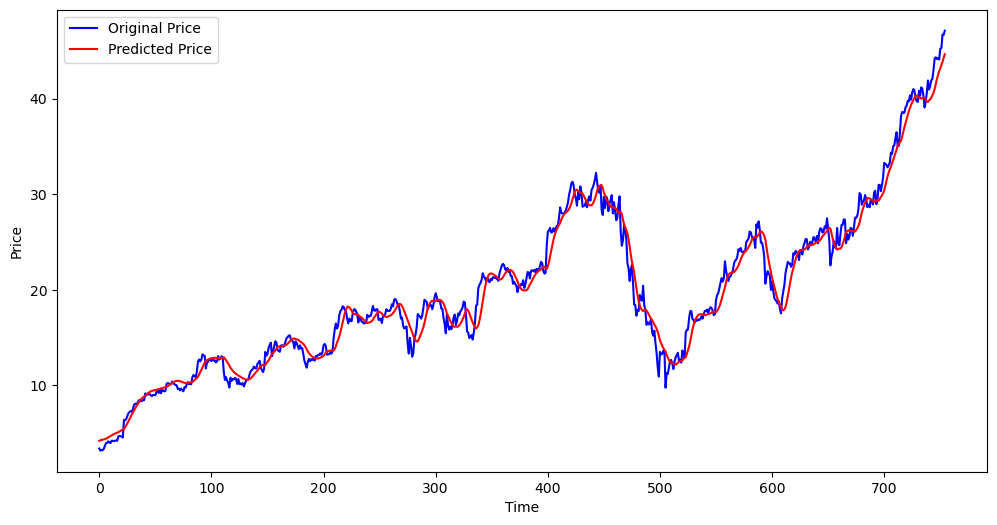

In [54]:
plt.figure(figsize=(12,6))

plt.plot(y_test,'b',label="Original Price")
plt.plot(y_pred,'r',label="Predicted Price")

plt.xlabel("Time")
plt.ylabel("Price")

plt.legend()
plt.show()